In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import psycopg2
from datetime import timedelta

%matplotlib inline

con = psycopg2.connect (user = 'postgres',
                password = 'postgres',
                port = '5432',
                
                database = 'inicudb')

cur  = con.cursor()

In [2]:
cur1 = con.cursor()
cur1.execute("SELECT t1.uhid,t1.dischargestatus,t1.birthweight,t1.gestationweekbylmp,t1.gestationdaysbylmp,t1.dateofadmission,t1.timeofadmission  FROM apollo.baby_detail AS t1 WHERE t1.dischargestatus = 'Discharge' OR t1.dischargestatus = 'Death';")
cols1 = list(map(lambda x: x[0], cur1.description))
ds = pd.DataFrame(cur1.fetchall(),columns=cols1)
#ds.sort_values('modificationtime',inplace=True)

In [3]:
def birthweight_correction(x):
    if x<0.6:
        return x * 1000
    elif x<2.0 and x>1.1:
        return x * 1000
    elif x>=2.0 and x<4.0:
        return x * 1000
    else:
        return x

In [4]:
ds.birthweight = ds.birthweight.apply(birthweight_correction)

In [5]:
def start_time(x,y):
    try:
        y = str(y)
        if x.split(',')[2] == 'AM':
            return y +" "+ x.split(',')[0] +":"+ x.split(',')[1] + ".000"
        else:
            return str(pd.to_datetime(y +" "+ x.split(',')[0] +":"+ (x.split(',')[1]) + ".000") + timedelta(hours=12))
    except:
        pass

In [6]:
ds['admission_date'] = ds.apply(lambda x: start_time(x['timeofadmission'],x['dateofadmission']),axis=1)

In [7]:
ds['gestation'] = ds['gestationweekbylmp'] + ds['gestationdaysbylmp']/7.0

In [8]:
ds = ds[(ds['birthweight']<=1500) | (ds['gestation']<=31)]

In [9]:
ds.count()

uhid                  353
dischargestatus       353
birthweight           353
gestationweekbylmp    353
gestationdaysbylmp    353
dateofadmission       353
timeofadmission       353
admission_date        350
gestation             353
dtype: int64

In [10]:
def to_date(x):
    return pd.to_datetime(x)

In [11]:
ds['admission_date'] = ds['admission_date'].apply(to_date)

In [12]:
ds['CRIB_1Hr'] = ds['admission_date'] + timedelta(hours = 12)

In [13]:
uhid = ['0000004042', 'RAMR.0000004016', 'RAMR.0000004821',
       'RJUB.0000015622', 'RNEH.0000008375', 'RNEH.0000011301',
       'RNEH.0000012581', 'RNEH.0000013713', 'RSHI.0000011975',
       'RSHI.0000012005', 'RSHI.0000012088', 'RSHI.0000013287',
       'RSHI.0000013804', 'RSHI.0000014720', 'RSHI.0000015178',
       'RSHI.0000015211', 'RSHI.0000015691', 'RSHI.0000016373',
       'RSHI.0000017471', 'RSHI.0000017472', 'RSHI.0000019707',
       'RSHI.0000021953', 'RSHI.0000023451', 'RSHI.0000025019',
      '0000014821',
'0000017227',
'0000018261',
'0000021745',
'0000028525',
'0000028546',
'0000031306',
'0000031402',
'0000031403',
'0000013967',
'00018290',
'0000014847',
'0000022334',
'023822',
'023868',
'023877',
'023878',
'023880',
'0000024658',
'0000025041',
'028628',
'028629',
'029189',
'032278',
'032338',
'032365',
'032377',
'032392',
'033174',
'033188',
'123456',
'1234567',
'9876543',
'ESHI.0000024559',
'RAMR.0000003268',
'RAMR.0000003764',
'RAMR.0000003954',
'RAMR.0000003966',
'RAMR.0000004033',
'RAMR.0000004059',
'RAMR.0000004070',
'RAMR.0000004115',
'RAMR.0000004131',
'RAMR.0000004176',
'RAMR.0000004189',
'RAMR.0000004206',
'RAMR.0000004239',
'RAMR.0000004292',
'RAMR.0000004336',
'RAMR.0000004399',
'RAMR.0000004424',
'RAMR.0000004452',
'RAMR.0000004703',
'RAMR.0000004844',
'RAMR.0000006362',
'RAMR.0000006714',
'RAMR.0000006731',
'RAMR.0000006977',
'RJAY.0000028039',
'RJAY.0000028144',
'RJAY.0000028308',
'RJAY.0000028396',
'RJAY.0000029065',
'RJAY.0000029243',
'RJAY.0000029244',
'RJAY.0000029266',
'RJAY.0000029476',
'RJAY.0000029521',
'RJAY.0000029528',
'RJAY.0000029529',
'RJAY.0000029553',
'RJAY.0000029554',
'RJAY.0000029566',
'RJAY.0000029574',
'RJAY.0000029591',
'RJAY.0000029638',
'RJAY.0000029651',
'RJAY.0000029666',
'RJAY.0000029719',
'RJAY.0000029839',
'RJAY.0000029860',
'RJAY.0000029866',
'RJAY.0000029881',
'RJAY.0000029922',
'RJAY.0000030003',
'RJAY.0000030025',
'RJAY.0000030040',
'RJAY.0000030120',
'RJAY.0000030211',
'RJAY.0000030249',
'RJAY.0000030339',
'RJAY.0000030359',
'RJAY.0000030368',
'RJAY.0000030371',
'RJAY.0000030561',
'RJAY.0000030562',
'RJAY.0000030671',
'RJAY.0000030680',
'RJAY.0000030702',
'RJAY.0000030715',
'RJAY.0000030759',
'RJAY.0000030760',
'RJAY.0000036124',
'RJAY0000028576',
'RJAY0000028580',
'RJAY000028525',
'RJOR.0000032680',
'RJUB 0000012696',
'RJUB 0000016511',
'RJUB..0000016849',
'RJUB.0000012544',
'RJUB.0000012983',
'RJUB.0000013239',
'RJUB.0000013458',
'RJUB.0000013488',
'RJUB.0000014513',
'RJUB.0000014618',
'RJUB.0000014669',
'RJUB.0000014679',
'RJUB.0000015013',
'RJUB.0000015017',
'RJUB.0000015317',
'RJUB.0000015322',
'RJUB.0000016947',
'RJUB.0000016952',
'RJUB.0000016974',
'RJUB.0000016988',
'RJUB.0000017195',
'RJUB.0000017260',
'RJUB.0000017785',
'RJUB.0000019111',
'RJUB.0000019230',
'RJUB.0000019325',
'RJUB.0000019327',
'RJUB.0000019385',
'RJUB.0000019420',
'RJUB.0000019463',
'RJUB.0000019745',
'RJUB.0000019859',
'RJUB.0000020015',
'RJUB.0000020044',
'RJUB.0000020108',
'RJUB.0000020186',
'RJUB.0000021016',
'RJUB.0000021035',
'RJUB.0000021067',
'RJUB.0000021071',
'RJUB.0000021125',
'RJUB.0000021142',
'RJUB.12475',
'RJUB0000013811',
'RJUB0000017100',
'RJUB0000017369',
'RJUBIPV6945',
'RKO.0000019611',
'RKON.0000008755',
'RKON.0000014915',
'RKON.0000017279',
'RKON.0000017733',
'RKON.0000017734',
'RKON.0000017759',
'RKON.0000017973',
'RKON.0000018142',
'RKON.0000018143',
'RKON.0000018176',
'RKON.0000018210',
'RKON.0000018262',
'RKON.0000018291',
'RKON.0000018392',
'RKON.0000018396',
'RKON.0000019292',
'RKON.0000019303',
'RKON.0000019394',
'RKON.0000019431',
'RKON.0000019611',
'RKON.0000019612',
'RKON.0000019649',
'RKON.0000020024',
'RKON.0000020051',
'RKON.0000020091',
'RKON.0000020308',
'RKON.0000020411',
'RKON.0000020412',
'RKON.0000020521',
'RKON.0000020636',
'RKON.0000020688',
'RKON.0000020708',
'RKON.0000020997',
'RKON.0000021017',
'RKON.0000021025',
'RKON.0000021190',
'RKON.0000021291',
'RKON.0000021550',
'RKON.0000021556',
'RKON.0000021815',
'RKON.0000022165',
'RKON.0000022239',
'RKON.0000023189',
'RKON.0000023340',
'RKON.0000023872',
'RKON.0000024053',
'RKON.0000024189',
'RKON.0000024277',
'RKON.0000024328',
'RKON.0000024367',
'RKON.0000024371',
'RKON.0000024438',
'RKON.0000024444',
'RKON.0000024491',
'RKON.0000024511',
'RKON.0000024718',
'RKON.0000024795',
'RKON.0000024825',
'RKON.0000024874',
'RKON.0000025000',
'RKON.0000026036',
'RKON.0000026046',
'RKON.0000026089',
'RKON.0000026255',
'RKON.0000026463',
'RKON.0000027',
'RKON.0000027048',
'RKON.0000027659',
'RKON.0000027751',
'RKON.0000027788',
'RKON.0000027791',
'RKON.0000028009',
'RKON.0000028026',
'RKON.0000028108',
'RKON.0000028168',
'RKON.0000028169',
'RKON.0000028800',
'RKON.0000029290',
'RKON.0000029370',
'RKON.0000029465',
'RKON.0000029501',
'RKON.0000029502',
'RKON.0000029691',
'RKON.0000029715',
'RKON.0000029742',
'RKON.0000029753',
'RKON.0000029796',
'RKON.0000029837',
'RKON.0000029938',
'RKON.0000029947',
'RKON.0000029948',
'RKON.0000029985',
'RKON.0000030065',
'RKON0000017733',
'RKON0000017734',
'RKON0000018321',
'RKON0000018340',
'RKON0000018625',
'RKON0000018690',
'RKON0000020398',
'RKON0000021017',
'RKON0000023241',
'RKON0000026255',
'RKON:0000021745',
'RKOR.00000029559',
'RKOR.0000027869',
'RKOR.0000028169',
'RKOR.0000028491',
'RKOR.0000028689',
'RKOR.0000028845',
'RKOR.0000028911',
'RKOR.0000029512',
'RKOR.0000029522',
'RKOR.0000029567',
'RKOR.0000029950',
'RKOR.0000029963',
'RKOR.0000029964',
'RKOR.0000029970',
'RKOR.0000029988',
'RKOR.0000030009',
'RKOR.0000030037',
'RKOR.0000030066',
'RKOR.0000030081',
'RKOR.0000030098',
'RKOR.0000030111',
'RKOR.0000030221',
'RKOR.0000030223',
'RKOR.0000030228',
'RKOR.0000030229',
'RKOR.0000030258',
'RKOR.0000030277',
'RKOR.0000030332',
'RKOR.0000030339',
'RKOR.0000030347',
'RKOR.0000030380',
'RKOR.0000030394',
'RKOR.0000030459',
'RKOR.0000030488',
'RKOR.0000030526',
'RKOR.0000030541',
'RKOR.0000030604',
'RKOR.0000030606',
'RKOR.0000030608',
'RKOR.0000030659',
'RKOR.0000030668',
'RKOR.0000030669',
'RKOR.0000030698',
'RKOR.0000030704',
'RKOR.0000030709',
'RKOR.0000030710',
'RKOR.0000030721',
'RKOR.0000030722',
'RKOR.0000030724',
'RKOR.0000030743',
'RKOR.0000030753',
'RKOR.0000030767',
'RKOR.0000030782',
'RKOR.0000030783',
'RKOR.0000030846',
'RKOR.0000030872',
'RKOR.0000030873',
'RKOR.0000030909',
'RKOR.0000030923',
'RKOR.0000030947',
'RKOR.0000030949',
'RKOR.0000030954',
'RKOR.0000030957',
'RKOR.0000030959',
'RKOR.0000030961',
'RKOR.0000030970',
'RKOR.0000030972',
'RKOR.0000030998',
'RKOR.0000031018',
'RKOR.0000031034',
'RKOR.0000031109',
'RKOR.0000031114',
'RKOR.0000031123',
'RKOR.0000031127',
'RKOR.0000031176',
'RKOR.0000031187',
'RKOR.0000031233',
'RKOR.0000031234',
'RKOR.0000031283',
'RKOR.0000031291',
'RKOR.0000031304',
'RKOR.0000031306',
'RKOR.0000031350',
'RKOR.0000031359',
'RKOR.0000031360',
'RKOR.0000031383',
'RKOR.0000031384',
'RKOR.0000031391',
'RKOR.0000031402',
'RKOR.0000031403',
'RKOR.0000031427',
'RKOR.0000031440',
'RKOR.0000031446',
'RKOR.0000031496',
'RKOR.0000031517',
'RKOR.0000031528',
'RKOR.0000031552',
'RKOR.0000031586',
'RKOR.0000031648',
'RKOR.0000031708',
'RKOR.0000031727',
'RKOR.0000031728',
'RKOR.0000031797',
'RKOR.0000032207',
'RKOR.0000032214',
'RKOR.0000032224',
'RKOR.0000032278',
'RKOR.0000032281',
'RKOR.0000032282',
'RKOR.0000032338',
'RKOR.0000032357',
'RKOR.0000032365',
'RKOR.0000032377',
'RKOR.0000032392',
'RKOR.0000032465',
'RKOR.0000032475',
'RKOR.0000032479',
'RKOR.0000032509',
'RKOR.0000032512',
'RKOR.0000032525',
'RKOR.0000032559',
'RKOR.0000032566',
'RKOR.0000032585',
'RKOR.0000032623',
'RKOR.0000032663',
'RKOR.0000032667',
'RKOR.0000032680',
'RKOR.0000032713',
'RKOR.0000032827',
'RKOR.0000032840',
'RKOR.0000032877',
'RKOR.0000032878',
'RKOR.0000032894',
'RKOR.0000032950',
'RKOR.0000032951',
'RKOR.0000032972',
'RKOR.0000032973',
'RKOR.0000033063',
'RKOR.0000033065',
'RKOR.0000033076',
'RKOR.0000033085',
'RKOR.0000033112',
'RKOR.0000033156',
'RKOR.0000033173',
'RKOR.0000033183',
'RKOR.0000033184',
'RKOR.0000033186',
'RKOR.0000033188',
'RKOR.0000033273',
'RKOR.0000033276',
'RKOR.0000033417',
'RKOR.0000033452',
'RKOR.0000033456',
'RKOR.0000033562',
'RKOR.0000033566',
'RKOR.0000033582',
'RKOR.0000033590',
'RKOR.0000033602',
'RKOR.0000033651',
'RKOR.0000033674',
'RKOR.0000033709',
'RKOR.0000033710',
'RKOR.0000033746',
'RKOR.0000033797',
'RKOR.0000033815',
'RKOR.0000033836',
'RKOR.0000033969',
'RKOR0000029558',
'RKORIPV15514',
'RKORIPV15515',
'RKOn.0000018143',
'RKOn.0000018759',
'RMAR.0000',
'RMAR.00000',
'RMAR.0000022048',
'RMAR.0000022170',
'RMAR.0000022230',
'RMAR.0000022413',
'RMAR.0000023461',
'RMAR.0000023462',
'RMAR.0000023788',
'RMAR.0000023945',
'RMAR.0000024348',
'RMAR.0000025204',
'RMAR.0000025277',
'RMAR.0000025325',
'RMAR.0000025337',
'RMAR.0000025350',
'RMAR.0000025351',
'RMAR.0000025384',
'RMAR.0000025432',
'RMAR.0000025445',
'RMAR.0000025448',
'RMAR.0000025479',
'RMAR.0000025482',
'RMAR.0000025487',
'RMAR.0000025566',
'RMAR.0000025578',
'RMAR.0000025675',
'RMAR.0000025712',
'RMAR.0000025715',
'RMAR.0000025728',
'RMAR.0000025834',
'RMAR.0000025882',
'RMAR.0000025883',
'RMAR.0000025892',
'RMAR.0000025953',
'RMAR.0000025961',
'RMAR.0000026483',
'RMAR.0000026533',
'RMAR.0000026549',
'RMAR.0000026636',
'RMAR.0000026647',
'RMAR.0000026672',
'RMAR.0000026673',
'RMAR.0000026725',
'RMAR.0000026834',
'RMAR.0000026956',
'RMAR.0000026969',
'RMAR.0000027003',
'RMAR.0000027016',
'RMAR.0000027018',
'RMAR.0000027744',
'RMAR.0000028112',
'RMAR.0000028207',
'RMAR.0000028218',
'RMAR.0000028284',
'RMAR.0000028394',
'RMAR.0000028763',
'RMAR.0000028952.',
'RMAR.0000029028',
'RMAR.0000029163',
'RMAR.0000029527.',
'RMAR.0000029654',
'RMAR.0000029888',
'RMAR.0000030319',
'RMAR.0000030323',
'RMAR.0000030485',
'RMAR.0000031936',
'RMAR.0000032045',
'RMAR.0000032463',
'RMAR.0000032787',
'RMAR.0000033452',
'RMAR.0000033532',
'RMAR.0000034214',
'RMAR.0000034257',
'RMAR.0000034365',
'RMAR.0000034393',
'RMAR.0000034414',
'RMAR.0000034697',
'RMAR.0000034706',
'RMAR.0000035245',
'RMAR.0000035444',
'RMAR.0000035545',
'RMAR.0000036124',
'RMAR.0000036240',
'RMAR.0000036457',
'RMAR.0000037457',
'RMAR.0000037719',
'RMAR.28653',
'RMAR0000030354',
'RMAR0000033311',
'RMAR0000034160',
'RMAR0000034287',
'RMAR0000035216',
'RMAR0000035245',
'RMAR0000035598',
'RMAR0000036253',
'RNEH.0000008001',
'RNEH.0000008002',
'RNEH.0000008033',
'RNEH.0000008114',
'RNEH.0000008203',
'RNEH.0000008204',
'RNEH.0000008223',
'RNEH.0000008291',
'RNEH.0000008302',
'RNEH.0000008351',
'RNEH.0000008377',
'RNEH.0000008463',
'RNEH.0000008465',
'RNEH.0000008973',
'RNEH.0000009026',
'RNEH.0000009029',
'RNEH.0000009034',
'RNEH.0000009061',
'RNEH.0000009145',
'RNEH.0000009161',
'RNEH.0000009213',
'RNEH.0000009215',
'RNEH.0000009255',
'RNEH.0000009259',
'RNEH.0000009286',
'RNEH.0000009308',
'RNEH.0000009364',
'RNEH.0000009374',
'RNEH.0000009387',
'RNEH.0000009424',
'RNEH.0000009495',
'RNEH.0000009497',
'RNEH.0000009510',
'RNEH.0000009511',
'RNEH.0000009541',
'RNEH.0000009542',
'RNEH.0000009579',
'RNEH.0000009580',
'RNEH.0000009584',
'RNEH.0000009594',
'RNEH.0000009600',
'RNEH.0000009619',
'RNEH.0000009621',
'RNEH.0000009640',
'RNEH.0000009642',
'RNEH.0000009643',
'RNEH.0000009674',
'RNEH.0000009725',
'RNEH.0000009758',
'RNEH.0000009759',
'RNEH.0000009768',
'RNEH.0000009782',
'RNEH.0000009809',
'RNEH.0000009810',
'RNEH.0000009811',
'RNEH.0000009831',
'RNEH.0000009915',
'RNEH.0000009918',
'RNEH.0000009919',
'RNEH.0000009924',
'RNEH.0000009996',
'RNEH.0000010008',
'RNEH.0000010025',
'RNEH.0000010038',
'RNEH.0000010180',
'RNEH.0000010181',
'RNEH.0000010204',
'RNEH.0000010208',
'RNEH.0000010271',
'RNEH.0000010366',
'RNEH.0000010373',
'RNEH.0000010401',
'RNEH.0000010413',
'RNEH.0000010414',
'RNEH.0000010430',
'RNEH.0000010431',
'RNEH.0000010432',
'RNEH.0000010460',
'RNEH.0000010466',
'RNEH.0000010483',
'RNEH.0000010518',
'RNEH.0000010531',
'RNEH.0000010533',
'RNEH.0000010546',
'RNEH.0000010548',
'RNEH.0000010581',
'RNEH.0000010601',
'RNEH.0000010631',
'RNEH.0000010637',
'RNEH.0000010679',
'RNEH.0000010694',
'RNEH.0000010724',
'RNEH.0000010725',
'RNEH.0000010738',
'RNEH.0000010769',
'RNEH.0000010783',
'RNEH.0000010784',
'RNEH.0000010807',
'RNEH.0000010849',
'RNEH.0000010900',
'RNEH.0000010901',
'RNEH.0000010916',
'RNEH.0000010921',
'RNEH.0000010929',
'RNEH.0000010930',
'RNEH.0000010962',
'RNEH.0000010984',
'RNEH.0000010990',
'RNEH.0000010998',
'RNEH.0000010999',
'RNEH.0000011138',
'RNEH.0000011143',
'RNEH.0000011190',
'RNEH.0000011211',
'RNEH.0000011229',
'RNEH.0000011260',
'RNEH.0000011300',
'RNEH.0000011313',
'RNEH.0000011335',
'RNEH.0000011404',
'RNEH.0000011410',
'RNEH.0000011571',
'RNEH.0000011572',
'RNEH.0000011614',
'RNEH.0000011679',
'RNEH.0000011749',
'RNEH.0000011769',
'RNEH.0000011784',
'RNEH.0000011788',
'RNEH.0000011822',
'RNEH.0000011823',
'RNEH.0000011824',
'RNEH.0000011834',
'RNEH.0000011837',
'RNEH.0000011876',
'RNEH.0000011886',
'RNEH.0000011916',
'RNEH.0000011967',
'RNEH.0000011968',
'RNEH.0000012022',
'RNEH.0000012078',
'RNEH.0000012079',
'RNEH.0000012137',
'RNEH.0000012232',
'RNEH.0000012246',
'RNEH.0000012254',
'RNEH.0000012273',
'RNEH.0000012304',
'RNEH.0000012325',
'RNEH.0000012326',
'RNEH.0000012370',
'RNEH.0000012957',
'RNEH.0000013016',
'RNEH.0000013035',
'RNEH.0000013044',
'RNEH.0000013059',
'RNEH.0000013131',
'RNEH.0000013157',
'RNEH.0000013174',
'RNEH.0000013188',
'RNEH.0000013236',
'RNEH.0000013244',
'RNEH.0000013396',
'RNEH.0000013403',
'RNEH.0000013622',
'RNEH.0000013623',
'RNEH.0000013640',
'RNEH.0000013707',
'RNEH.0000013716',
'RNEH.0000013742',
'RNEH.0000013743',
'RNEH.0000013772',
'RNEH.0000013795',
'RNEH.0000013808',
'RNEH.0000013810',
'RNEH.0000013902',
'RNEH.0000013947',
'RNEH.0000013973',
'RNEH.0000013990',
'RNEH.0000014021',
'RNEH.0000014035',
'RNEH.0000014063',
'RNEH.0000014283',
'RNEH.0000014284',
'RNEH.0000014297',
'RNEH.0000014315',
'RNEH.0000014351',
'RNEH.0000014361',
'RNEH.0000014375',
'RNEH.0000014467',
'RNEH.0000014468',
'RNEH.0000014469',
'RNEH.0000014474',
'RNEH.0000014491',
'RNEH.0000014500',
'RNEH.0000014505',
'RNEH.0000014519',
'RNEH.0000014520',
'RNEH.0000014549',
'RNEH.0000014594',
'RNEH.0000014612',
'RNEH.0000014647',
'RNEH.0000014660',
'RNEH.0000014661',
'RNEH.0000014666',
'RNEH.0000014668',
'RNEH.0000014721',
'RNEH.0000014736',
'RNEH.0000014738',
'RNEH.0000014739',
'RNEH.0000014800',
'RNEH.0000014853',
'RNEH0000008156',
'RNEH0000008223',
'RSHI.00000024318',
'RSHI.00000024413',
'RSHI.00000024541',
'RSHI.0000007129',
'RSHI.0000011120',
'RSHI.0000011571',
'RSHI.0000011572',
'RSHI.0000011574',
'RSHI.0000011857',
'RSHI.0000011935',
'RSHI.0000011941',
'RSHI.0000011942',
'RSHI.0000011952',
'RSHI.0000011964',
'RSHI.0000011969',
'RSHI.0000011971',
'RSHI.0000011976',
'RSHI.0000011988',
'RSHI.0000011990',
'RSHI.0000011992',
'RSHI.0000011993',
'RSHI.0000012002',
'RSHI.0000012003',
'RSHI.0000012004',
'RSHI.0000012041',
'RSHI.0000012050',
'RSHI.0000012072',
'RSHI.0000012073',
'RSHI.0000012083',
'RSHI.0000012087',
'RSHI.0000012100',
'RSHI.0000012152',
'RSHI.0000012200',
'RSHI.0000012214',
'RSHI.0000012235',
'RSHI.0000012260',
'RSHI.0000012261',
'RSHI.0000012276',
'RSHI.0000012306',
'RSHI.0000012308',
'RSHI.0000012314',
'RSHI.0000012315',
'RSHI.0000012316',
'RSHI.0000012317',
'RSHI.0000012325',
'RSHI.0000012361',
'RSHI.0000012362',
'RSHI.0000012386',
'RSHI.0000012387',
'RSHI.0000012388',
'RSHI.0000012436',
'RSHI.0000012451',
'RSHI.0000012505',
'RSHI.0000012538',
'RSHI.0000012587',
'RSHI.0000012600',
'RSHI.0000012602',
'RSHI.0000012661',
'RSHI.0000012702',
'RSHI.0000012715',
'RSHI.0000012743',
'RSHI.0000012772',
'RSHI.0000012789',
'RSHI.0000012803',
'RSHI.0000012827',
'RSHI.0000012828',
'RSHI.0000012830',
'RSHI.0000012831',
'RSHI.0000012850',
'RSHI.0000012851',
'RSHI.0000012865',
'RSHI.0000012903',
'RSHI.0000012924',
'RSHI.0000012925',
'RSHI.0000012962',
'RSHI.0000012964',
'RSHI.0000012965',
'RSHI.0000012966',
'RSHI.0000012969',
'RSHI.0000012984',
'RSHI.0000012985',
'RSHI.0000012988',
'RSHI.0000013011',
'RSHI.0000013024',
'RSHI.0000013025',
'RSHI.0000013030',
'RSHI.0000013036',
'RSHI.0000013061',
'RSHI.0000013066',
'RSHI.0000013162',
'RSHI.0000013163',
'RSHI.0000013188',
'RSHI.0000013252',
'RSHI.0000013253',
'RSHI.0000013263',
'RSHI.0000013264',
'RSHI.0000013266',
'RSHI.0000013272',
'RSHI.0000013288',
'RSHI.0000013298',
'RSHI.0000013299',
'RSHI.0000013331',
'RSHI.0000013377',
'RSHI.0000013379',
'RSHI.0000013390',
'RSHI.0000013392',
'RSHI.0000013446',
'RSHI.0000013576',
'RSHI.0000013579',
'RSHI.0000013614',
'RSHI.0000013617',
'RSHI.0000013631',
'RSHI.0000013652',
'RSHI.0000013699',
'RSHI.0000013701',
'RSHI.0000013718',
'RSHI.0000013747',
'RSHI.0000013800',
'RSHI.0000013807',
'RSHI.0000013824',
'RSHI.0000013826',
'RSHI.0000013841',
'RSHI.0000013907',
'RSHI.0000013938',
'RSHI.0000013961',
'RSHI.0000013995',
'RSHI.0000013998',
'RSHI.0000014044',
'RSHI.0000014054',
'RSHI.0000014097',
'RSHI.0000014103',
'RSHI.0000014177',
'RSHI.0000014191',
'RSHI.0000014195',
'RSHI.0000014196',
'RSHI.0000014205',
'RSHI.0000014215',
'RSHI.0000014218',
'RSHI.0000014239',
'RSHI.0000014240',
'RSHI.0000014244',
'RSHI.0000014261',
'RSHI.0000014262',
'RSHI.0000014264',
'RSHI.0000014265',
'RSHI.0000014267',
'RSHI.0000014268',
'RSHI.0000014285',
'RSHI.0000014297',
'RSHI.0000014306',
'RSHI.0000014313',
'RSHI.0000014318',
'RSHI.0000014320',
'RSHI.0000014325',
'RSHI.0000014327',
'RSHI.0000014330',
'RSHI.0000014331',
'RSHI.0000014366',
'RSHI.0000014367',
'RSHI.0000014368',
'RSHI.0000014371',
'RSHI.0000014378',
'RSHI.0000014389',
'RSHI.0000014399',
'RSHI.0000014400',
'RSHI.0000014407',
'RSHI.0000014433',
'RSHI.0000014442',
'RSHI.0000014456',
'RSHI.0000014457',
'RSHI.0000014463',
'RSHI.0000014468',
'RSHI.0000014472',
'RSHI.0000014497',
'RSHI.0000014510',
'RSHI.0000014511',
'RSHI.0000014517',
'RSHI.0000014530',
'RSHI.0000014575',
'RSHI.0000014580',
'RSHI.0000014592',
'RSHI.0000014628',
'RSHI.0000014648',
'RSHI.0000014664',
'RSHI.0000014665',
'RSHI.0000014666',
'RSHI.0000014677',
'RSHI.0000014687',
'RSHI.0000014688',
'RSHI.0000014691',
'RSHI.0000014694',
'RSHI.0000014695',
'RSHI.0000014699',
'RSHI.0000014716',
'RSHI.0000014719',
'RSHI.0000014730',
'RSHI.0000014731',
'RSHI.0000014736',
'RSHI.0000014844',
'RSHI.0000014845',
'RSHI.0000014848',
'RSHI.0000014859',
'RSHI.0000014883',
'RSHI.0000014884',
'RSHI.0000014898',
'RSHI.0000014902',
'RSHI.0000014904',
'RSHI.0000014908',
'RSHI.0000014911',
'RSHI.0000014932',
'RSHI.0000014933',
'RSHI.0000014934',
'RSHI.0000014935',
'RSHI.0000014949',
'RSHI.0000014962',
'RSHI.0000014969',
'RSHI.0000014975',
'RSHI.0000014999',
'RSHI.0000015000',
'RSHI.0000015014',
'RSHI.0000015015',
'RSHI.0000015043',
'RSHI.0000015054',
'RSHI.0000015057',
'RSHI.0000015058',
'RSHI.0000015065',
'RSHI.0000015066',
'RSHI.0000015104',
'RSHI.0000015117',
'RSHI.0000015118',
'RSHI.0000015134',
'RSHI.0000015136',
'RSHI.0000015137',
'RSHI.0000015140',
'RSHI.0000015141',
'RSHI.0000015144',
'RSHI.0000015173',
'RSHI.0000015179',
'RSHI.0000015187',
'RSHI.0000015209',
'RSHI.0000015212',
'RSHI.0000015213',
'RSHI.0000015231',
'RSHI.0000015281',
'RSHI.0000015284',
'RSHI.0000015297',
'RSHI.0000015331',
'RSHI.0000015336',
'RSHI.0000015402',
'RSHI.0000015415',
'RSHI.0000015420',
'RSHI.0000015449',
'RSHI.0000015458',
'RSHI.0000015459',
'RSHI.0000015482',
'RSHI.0000015491',
'RSHI.0000015492',
'RSHI.0000015493',
'RSHI.0000015522',
'RSHI.0000015540',
'RSHI.0000015541',
'RSHI.0000015552',
'RSHI.0000015561',
'RSHI.0000015581',
'RSHI.0000015582',
'RSHI.0000015585',
'RSHI.0000015613',
'RSHI.0000015614',
'RSHI.0000015643',
'RSHI.0000015661',
'RSHI.0000015663',
'RSHI.0000015668',
'RSHI.0000015736',
'RSHI.0000015737',
'RSHI.0000015741',
'RSHI.0000015772',
'RSHI.0000015793',
'RSHI.0000015809',
'RSHI.0000015810',
'RSHI.0000015868',
'RSHI.0000015873',
'RSHI.0000015883',
'RSHI.0000015920',
'RSHI.0000015938',
'RSHI.0000015959',
'RSHI.0000015960',
'RSHI.0000015961',
'RSHI.0000015979',
'RSHI.0000016050',
'RSHI.0000016084',
'RSHI.0000016112',
'RSHI.0000016137',
'RSHI.0000016142',
'RSHI.0000016147',
'RSHI.0000016148',
'RSHI.0000016149',
'RSHI.0000016185',
'RSHI.0000016193',
'RSHI.0000016194',
'RSHI.0000016281',
'RSHI.0000016283',
'RSHI.0000016285',
'RSHI.0000016291',
'RSHI.0000016292',
'RSHI.0000016315',
'RSHI.0000016316',
'RSHI.0000016323',
'RSHI.0000016325',
'RSHI.0000016326',
'RSHI.0000016330',
'RSHI.0000016343',
'RSHI.0000016344',
'RSHI.0000016365',
'RSHI.0000016388',
'RSHI.0000016395',
'RSHI.0000016434',
'RSHI.0000016453',
'RSHI.0000016454',
'RSHI.0000016460',
'RSHI.0000016502',
'RSHI.0000016503',
'RSHI.0000016511',
'RSHI.0000016520',
'RSHI.0000016530',
'RSHI.0000016535',
'RSHI.0000016564',
'RSHI.0000016565',
'RSHI.0000016595',
'RSHI.0000016604',
'RSHI.0000016623',
'RSHI.0000016647',
'RSHI.0000016651',
'RSHI.0000016665',
'RSHI.0000016666',
'RSHI.0000016669',
'RSHI.0000016689',
'RSHI.0000016705',
'RSHI.0000016706',
'RSHI.0000016765',
'RSHI.0000016766',
'RSHI.0000016771',
'RSHI.0000016772',
'RSHI.0000016773',
'RSHI.0000016774',
'RSHI.0000016790',
'RSHI.0000016832',
'RSHI.0000016836',
'RSHI.0000016859',
'RSHI.0000016863',
'RSHI.0000016872',
'RSHI.0000016893',
'RSHI.0000016924',
'RSHI.0000016935',
'RSHI.0000016943',
'RSHI.0000016969',
'RSHI.0000016970',
'RSHI.0000017047',
'RSHI.0000017056',
'RSHI.0000017057',
'RSHI.0000017091',
'RSHI.0000017094',
'RSHI.0000017129',
'RSHI.0000017143',
'RSHI.0000017210',
'RSHI.0000017306',
'RSHI.0000017376',
'RSHI.0000017430',
'RSHI.0000017431',
'RSHI.0000017466',
'RSHI.0000017474',
'RSHI.0000017512',
'RSHI.0000017547',
'RSHI.0000017562',
'RSHI.0000017577',
'RSHI.0000017602',
'RSHI.0000017603',
'RSHI.0000017623',
'RSHI.0000017624',
'RSHI.0000017634',
'RSHI.0000017640',
'RSHI.0000017641',
'RSHI.0000017651',
'RSHI.0000017652',
'RSHI.0000017681',
'RSHI.0000017692',
'RSHI.0000017734',
'RSHI.0000017762',
'RSHI.0000017763',
'RSHI.0000017787',
'RSHI.0000017800',
'RSHI.0000017817',
'RSHI.0000017866',
'RSHI.0000017874',
'RSHI.0000017888',
'RSHI.0000017893',
'RSHI.0000017909',
'RSHI.0000017917',
'RSHI.0000017918',
'RSHI.0000017919',
'RSHI.0000017931',
'RSHI.0000017951',
'RSHI.0000017956',
'RSHI.0000017981',
'RSHI.0000018006',
'RSHI.0000018016',
'RSHI.0000018050',
'RSHI.0000018051',
'RSHI.0000018080',
'RSHI.0000018082',
'RSHI.0000018095',
'RSHI.0000018114',
'RSHI.0000018136',
'RSHI.0000018151',
'RSHI.0000018152',
'RSHI.0000018153',
'RSHI.0000018162',
'RSHI.0000018206',
'RSHI.0000018207',
'RSHI.0000018209',
'RSHI.0000018215',
'RSHI.0000018232',
'RSHI.0000018289',
'RSHI.0000018310',
'RSHI.0000018312',
'RSHI.0000018314',
'RSHI.0000018357',
'RSHI.0000018379',
'RSHI.0000018381',
'RSHI.0000018383',
'RSHI.0000018384',
'RSHI.0000018391',
'RSHI.0000018392',
'RSHI.0000018438',
'RSHI.0000018456',
'RSHI.0000018457',
'RSHI.0000018468',
'RSHI.0000018523',
'RSHI.0000018537',
'RSHI.0000018554',
'RSHI.0000018556',
'RSHI.0000018584',
'RSHI.0000018598',
'RSHI.0000018600',
'RSHI.0000018646',
'RSHI.0000018668',
'RSHI.0000018687',
'RSHI.0000018698',
'RSHI.0000018734',
'RSHI.0000018749',
'RSHI.0000018757',
'RSHI.0000018771',
'RSHI.0000018789',
'RSHI.0000018812',
'RSHI.0000018830',
'RSHI.0000018836',
'RSHI.0000018896',
'RSHI.0000018899',
'RSHI.0000018903',
'RSHI.0000018904',
'RSHI.0000018967',
'RSHI.0000018972',
'RSHI.0000018973',
'RSHI.0000018975',
'RSHI.0000018977',
'RSHI.0000019011',
'RSHI.0000019030',
'RSHI.0000019056',
'RSHI.0000019088',
'RSHI.0000019089',
'RSHI.0000019134',
'RSHI.0000019142',
'RSHI.0000019145',
'RSHI.0000019147',
'RSHI.0000019149',
'RSHI.0000019151',
'RSHI.0000019171',
'RSHI.0000019172',
'RSHI.0000019186',
'RSHI.0000019213',
'RSHI.0000019298',
'RSHI.0000019414',
'RSHI.0000019415',
'RSHI.0000019422',
'RSHI.0000019423',
'RSHI.0000019435',
'RSHI.0000019458',
'RSHI.0000019463',
'RSHI.0000019468',
'RSHI.0000019495',
'RSHI.0000019496',
'RSHI.0000019518',
'RSHI.0000019528',
'RSHI.0000019545',
'RSHI.0000019546',
'RSHI.0000019552',
'RSHI.0000019560',
'RSHI.0000019579',
'RSHI.0000019580',
'RSHI.0000019611',
'RSHI.0000019631',
'RSHI.0000019640',
'RSHI.0000019646',
'RSHI.0000019654',
'RSHI.0000019662',
'RSHI.0000019692',
'RSHI.0000019740',
'RSHI.0000019757',
'RSHI.0000019760',
'RSHI.0000019761',
'RSHI.0000019772',
'RSHI.0000019785',
'RSHI.0000019799',
'RSHI.0000019802',
'RSHI.0000019805',
'RSHI.000001984',
'RSHI.0000019841',
'RSHI.0000019842',
'RSHI.0000019849',
'RSHI.0000019884',
'RSHI.0000019885',
'RSHI.0000019886',
'RSHI.0000019890',
'RSHI.0000019900',
'RSHI.0000019909',
'RSHI.0000019921',
'RSHI.0000019932',
'RSHI.0000019933',
'RSHI.0000019943',
'RSHI.0000019945',
'RSHI.0000019947',
'RSHI.0000019951',
'RSHI.0000019960',
'RSHI.0000019985',
'RSHI.0000019993',
'RSHI.0000019996',
'RSHI.0000020',
'RSHI.0000020010',
'RSHI.0000020020',
'RSHI.0000020028',
'RSHI.0000020032',
'RSHI.0000020034',
'RSHI.0000020035',
'RSHI.0000020039',
'RSHI.0000020045',
'RSHI.0000020046',
'RSHI.0000020048',
'RSHI.0000020049',
'RSHI.0000020056',
'RSHI.0000020069',
'RSHI.0000020092',
'RSHI.0000020096',
'RSHI.0000020122',
'RSHI.0000020126',
'RSHI.0000020134',
'RSHI.0000020146',
'RSHI.0000020169',
'RSHI.0000020191',
'RSHI.0000020197',
'RSHI.0000020205',
'RSHI.0000020206',
'RSHI.0000020226',
'RSHI.0000020241',
'RSHI.0000020242',
'RSHI.0000020251',
'RSHI.0000020252',
'RSHI.0000020276',
'RSHI.0000020294',
'RSHI.0000020326',
'RSHI.0000020345',
'RSHI.0000020346',
'RSHI.0000020363',
'RSHI.0000020376',
'RSHI.0000020401',
'RSHI.0000020406',
'RSHI.0000020416',
'RSHI.0000020420',
'RSHI.0000020432',
'RSHI.0000020452',
'RSHI.0000020456',
'RSHI.0000020507',
'RSHI.0000020524',
'RSHI.0000020534',
'RSHI.0000020538',
'RSHI.0000020539',
'RSHI.0000020554',
'RSHI.0000020556',
'RSHI.0000020572',
'RSHI.0000020574',
'RSHI.0000020600',
'RSHI.0000020601',
'RSHI.0000020604',
'RSHI.0000020606',
'RSHI.0000020614',
'RSHI.0000020704',
'RSHI.0000020724',
'RSHI.0000020741',
'RSHI.0000020758',
'RSHI.0000020760',
'RSHI.0000020766',
'RSHI.0000020774',
'RSHI.0000020779',
'RSHI.0000020805',
'RSHI.0000020806',
'RSHI.0000020858',
'RSHI.0000020872',
'RSHI.0000020900',
'RSHI.0000020930',
'RSHI.0000021001',
'RSHI.0000021004',
'RSHI.0000021024',
'RSHI.0000021037',
'RSHI.0000021051',
'RSHI.0000021067',
'RSHI.0000021068',
'RSHI.0000021071',
'RSHI.0000021107',
'RSHI.0000021161',
'RSHI.0000021218',
'RSHI.0000021224',
'RSHI.0000021244',
'RSHI.0000021284',
'RSHI.0000021301',
'RSHI.0000021305',
'RSHI.0000021306',
'RSHI.0000021307',
'RSHI.0000021320',
'RSHI.0000021321',
'RSHI.0000021329',
'RSHI.0000021367',
'RSHI.0000021398',
'RSHI.0000021521',
'RSHI.0000021556',
'RSHI.0000021579',
'RSHI.0000021586',
'RSHI.0000021634',
'RSHI.0000021779',
'RSHI.0000021806',
'RSHI.0000021807',
'RSHI.0000021832',
'RSHI.0000021833',
'RSHI.0000021834',
'RSHI.0000021841',
'RSHI.0000021856',
'RSHI.0000021866',
'RSHI.0000021870',
'RSHI.0000021888',
'RSHI.0000021910',
'RSHI.0000021977',
'RSHI.0000021999',
'RSHI.0000022000',
'RSHI.0000022040',
'RSHI.0000022051',
'RSHI.0000022054',
'RSHI.0000022064',
'RSHI.0000022092',
'RSHI.0000022093',
'RSHI.0000022108',
'RSHI.0000022117',
'RSHI.0000022118',
'RSHI.0000022132',
'RSHI.0000022137',
'RSHI.0000022144',
'RSHI.0000022203',
'RSHI.0000022204',
'RSHI.0000022214',
'RSHI.0000022215',
'RSHI.0000022234',
'RSHI.0000022235',
'RSHI.0000022240',
'RSHI.0000022270',
'RSHI.0000022277',
'RSHI.0000022302',
'RSHI.0000022306',
'RSHI.0000022307',
'RSHI.0000022313',
'RSHI.0000022314',
'RSHI.0000022318',
'RSHI.0000022327',
'RSHI.0000022328',
'RSHI.0000022335',
'RSHI.0000022346',
'RSHI.0000022355',
'RSHI.0000022399',
'RSHI.0000022404',
'RSHI.0000022436',
'RSHI.0000022450',
'RSHI.0000022461',
'RSHI.0000022469',
'RSHI.0000022472',
'RSHI.0000022479',
'RSHI.0000022489',
'RSHI.0000022514',
'RSHI.0000022525',
'RSHI.0000022526',
'RSHI.0000022527',
'RSHI.0000022529',
'RSHI.0000022541',
'RSHI.0000022553',
'RSHI.0000022564',
'RSHI.0000022599',
'RSHI.0000022615',
'RSHI.0000022621',
'RSHI.0000022623',
'RSHI.0000022632',
'RSHI.0000022645',
'RSHI.0000022660',
'RSHI.0000022665',
'RSHI.0000022682',
'RSHI.0000022683',
'RSHI.0000022710',
'RSHI.0000022718',
'RSHI.0000022732',
'RSHI.0000022735',
'RSHI.0000022761',
'RSHI.0000022773',
'RSHI.0000022786',
'RSHI.0000022808',
'RSHI.0000022830',
'RSHI.0000022834',
'RSHI.0000022848',
'RSHI.0000022849',
'RSHI.0000022850',
'RSHI.0000022854',
'RSHI.0000022867',
'RSHI.0000022871',
'RSHI.0000022880',
'RSHI.0000022896',
'RSHI.0000022953',
'RSHI.0000022954',
'RSHI.0000022970',
'RSHI.0000022971',
'RSHI.0000022975',
'RSHI.0000022976',
'RSHI.0000022978',
'RSHI.0000023049',
'RSHI.0000023050',
'RSHI.0000023057',
'RSHI.0000023059',
'RSHI.0000023083',
'RSHI.0000023088',
'RSHI.0000023115',
'RSHI.0000023122',
'RSHI.0000023173',
'RSHI.0000023174',
'RSHI.0000023176',
'RSHI.0000023179',
'RSHI.0000023186',
'RSHI.0000023193',
'RSHI.0000023202',
'RSHI.0000023222',
'RSHI.0000023223',
'RSHI.0000023241',
'RSHI.0000023255',
'RSHI.0000023268',
'RSHI.0000023334',
'RSHI.0000023343',
'RSHI.0000023390',
'RSHI.0000023417',
'RSHI.0000023418',
'RSHI.0000023452',
'RSHI.0000023460',
'RSHI.0000023490',
'RSHI.0000023500',
'RSHI.0000023527',
'RSHI.0000023554',
'RSHI.0000023674',
'RSHI.0000023724',
'RSHI.0000023754',
'RSHI.0000023765',
'RSHI.0000023766',
'RSHI.0000023771',
'RSHI.0000023776',
'RSHI.0000023777',
'RSHI.0000023780',
'RSHI.0000023786',
'RSHI.0000023787',
'RSHI.0000023788',
'RSHI.0000023789',
'RSHI.0000023842',
'RSHI.0000023843',
'RSHI.0000023852',
'RSHI.0000023907',
'RSHI.0000023949',
'RSHI.0000023956',
'RSHI.0000024035',
'RSHI.0000024036',
'RSHI.0000024065',
'RSHI.0000024069',
'RSHI.0000024070',
'RSHI.0000024071',
'RSHI.0000024076',
'RSHI.0000024092',
'RSHI.0000024094',
'RSHI.0000024185',
'RSHI.0000024186',
'RSHI.0000024258',
'RSHI.0000024263',
'RSHI.0000024315',
'RSHI.0000024316',
'RSHI.0000024318',
'RSHI.0000024369',
'RSHI.0000024405',
'RSHI.0000024406',
'RSHI.0000024409',
'RSHI.0000024413',
'RSHI.0000024418',
'RSHI.0000024435',
'RSHI.0000024464',
'RSHI.0000024467',
'RSHI.0000024482',
'RSHI.0000024493',
'RSHI.0000024495',
'RSHI.0000024501',
'RSHI.0000024531',
'RSHI.0000024533',
'RSHI.0000024534',
'RSHI.0000024538',
'RSHI.0000024559',
'RSHI.0000024581',
'RSHI.0000024607',
'RSHI.0000024608',
'RSHI.0000024640',
'RSHI.0000024641',
'RSHI.0000024651',
'RSHI.0000024652',
'RSHI.0000024658',
'RSHI.0000024689',
'RSHI.0000024690',
'RSHI.0000024697',
'RSHI.0000024700',
'RSHI.0000024720',
'RSHI.0000024733',
'RSHI.0000024818',
'RSHI.0000024844',
'RSHI.0000024845',
'RSHI.0000024854',
'RSHI.0000024875',
'RSHI.0000024877',
'RSHI.0000024882',
'RSHI.0000024884',
'RSHI.0000024885',
'RSHI.0000024901',
'RSHI.0000024958',
'RSHI.0000025014',
'RSHI.0000025025',
'RSHI.0000025026',
'RSHI.0000025045',
'RSHI.0000025088',
'RSHI.0000025089',
'RSHI.0000025104',
'RSHI.0000025109',
'RSHI.0000025165',
'RSHI.0000025173',
'RSHI.0000025207',
'RSHI.0000025210',
'RSHI.0000025218',
'RSHI.0000025219',
'RSHI.0000025226',
'RSHI.0000025274',
'RSHI.0000025285',
'RSHI.0000025321',
'RSHI.0000025334',
'RSHI.0000025344',
'RSHI.0000025366',
'RSHI.0000025368',
'RSHI.0000025386',
'RSHI.0000025397',
'RSHI.0000025413',
'RSHI.0000025461',
'RSHI.0000025476',
'RSHI.0000025495',
'RSHI.0000025507',
'RSHI.0000025516',
'RSHI.0000025525',
'RSHI.0000025533',
'RSHI.0000025534',
'RSHI.0000025553',
'RSHI.0000025560',
'RSHI.0000025601',
'RSHI.000021978',
'RSHI.000023494',
'RSHI00000.19235',
'RSHI00000.19243',
'RSHI00000.19244',
'RSHI0000016859',
'RSHI0000017091',
'RSHI0000017181',
'RSHI0000017199',
'RSHI0000017262',
'RSHI0000017263',
'RSHI0000017284',
'RSHI0000017338',
'RSHI0000017355',
'RSHI0000017397',
'RSHI0000017416',
'RSHI0000017417',
'RSHI0000017420',
'RSHI0000017466',
'RSHI0000017689',
'RSHI0000017909',
'RSHI0000017977',
'RSHI0000018009',
'RSHI0000018132',
'RSHI0000018464',
'RSHI0000018600',
'RSHI0000018797',
'RSHI0000019063',
'RSHI0000019194',
'RSHI0000019344',
'RSHI0000019822',
'RSHI0000020022',
'RSHI0000022137',
'RSHI0000022853',
'RSHI0000022951',
'RSHI0000022956',
'RSHI0000022971',
'RSHI0000023015',
'RSHI0000023056',
'RSHI0000023106',
'SKAR.0000063490',
'SKON.0000008851',
'rkon.0000022772',
'rkon.0000024053',
'rkon.0000024794',
'rkon.0000024795',
'rmar.0000036068',
'skon.0000010685',
'uhid00001234']

In [14]:
#Max BE
cur2 = con.cursor()
cur2.execute("SELECT t1.uhid,t1.be,t1.modificationtime FROM apollo.nursing_bloodgas AS t1 ;")
cols2 = list(map(lambda x: x[0], cur2.description))
be = pd.DataFrame(cur2.fetchall(),columns=cols2)
#ds.sort_values('modificationtime',inplace=True)

In [15]:
be_1 = pd.DataFrame(columns=be.columns)
for i in uhid:
    try:
        x = be[be['uhid']==i]
        u = ds[ds['uhid']==i]
        j = u.CRIB_1Hr.iloc[0]
        print(i)

        x = x[x['modificationtime']<=j]
        be_1 = be_1.append(x,ignore_index=True)
    except:
        continue

0000004042
RJUB.0000015622
RNEH.0000008375
RNEH.0000011301
RNEH.0000012581
RSHI.0000012005
RSHI.0000012088
RSHI.0000013287
RSHI.0000013804
RSHI.0000014720
RSHI.0000015178
RSHI.0000015211
RSHI.0000015691
RSHI.0000017471
RSHI.0000019707
RSHI.0000021953
RSHI.0000023451
0000028546
023877
1234567
RAMR.0000003268
RAMR.0000004059
RAMR.0000004115
RAMR.0000004176
RAMR.0000004189
RAMR.0000004206
RAMR.0000004239
RAMR.0000006362
RAMR.0000006714
RJAY.0000028144
RJAY.0000028308
RJAY.0000028396
RJAY.0000030671
RJAY000028525
RJOR.0000032680
RJUB 0000016511
RJUB.0000012544
RJUB.0000013239
RJUB.0000013458
RJUB.0000013488
RJUB.0000014513
RJUB.0000015317
RJUB.12475
RJUB0000017369
RKON.0000018143
RKON.0000018210
RKON.0000018291
RKON.0000018392
RKON.0000018396
RKON.0000023872
RKON0000018625
RKOR.0000027869
RKOR.0000028169
RKOR.0000028491
RKOR.0000028689
RKOR.0000028845
RKOR.0000028911
RKOR.0000029512
RKOR.0000029567
RKOR.0000032559
RKOR.0000032680
RKOR.0000032877
RKOR.0000032878
RKOR.0000033651
RKOn.0000018

In [16]:
#Max and Min
cur3 = con.cursor()
cur3.execute("SELECT t1.uhid,t1.fio2,t1.start_time,t1.modificationtime FROM apollo.device_ventilator_detail AS t1 ;")
cols3 = list(map(lambda x: x[0], cur3.description))
fio2 = pd.DataFrame(cur3.fetchall(),columns=cols3)
#ds.sort_values('modificationtime',inplace=True)

In [17]:
fio2_1 = pd.DataFrame(columns=fio2.columns)

In [18]:
for i in uhid:
    try:
        x = fio2[fio2['uhid']==i]
        u = ds[ds['uhid']==i]
        j = u.CRIB_1Hr.iloc[0]
        

        x = x[x['modificationtime']<=j]
        print(i)
        fio2_1 = fio2_1.append(x,ignore_index=True)
        
    except:
        continue

0000004042
RJUB.0000015622
RNEH.0000008375
RNEH.0000011301
RNEH.0000012581
RSHI.0000012005
RSHI.0000012088
RSHI.0000013287
RSHI.0000013804
RSHI.0000014720
RSHI.0000015178
RSHI.0000015211
RSHI.0000015691
RSHI.0000017471
RSHI.0000019707
RSHI.0000021953
RSHI.0000023451
0000028546
023877
1234567
RAMR.0000003268
RAMR.0000004059
RAMR.0000004115
RAMR.0000004176
RAMR.0000004189
RAMR.0000004206
RAMR.0000004239
RAMR.0000006362
RAMR.0000006714
RJAY.0000028144
RJAY.0000028308
RJAY.0000028396
RJAY.0000030671
RJAY000028525
RJOR.0000032680
RJUB 0000016511
RJUB.0000012544
RJUB.0000013239
RJUB.0000013458
RJUB.0000013488
RJUB.0000014513
RJUB.0000015317
RJUB.12475
RJUB0000017369
RKON.0000018143
RKON.0000018210
RKON.0000018291
RKON.0000018392
RKON.0000018396
RKON.0000023872
RKON0000018625
RKOR.0000027869
RKOR.0000028169
RKOR.0000028491
RKOR.0000028689
RKOR.0000028845
RKOR.0000028911
RKOR.0000029512
RKOR.0000029567
RKOR.0000032559
RKOR.0000032680
RKOR.0000032877
RKOR.0000032878
RKOR.0000033651
RKOn.0000018

In [19]:
test = be.drop_duplicates('uhid',keep='first')

In [20]:
test.count()

uhid                677
be                  311
modificationtime    677
dtype: int64

In [21]:
def to_float(x):
    try:
        return float(x)
    except:
        pass

In [22]:
fio2_1.fio2 = fio2_1.fio2.apply(to_float)

In [23]:
fio2_max_min = pd.DataFrame(columns=['uhid','max_fio2','min_fio2'])

In [24]:
#Calculating Maximum and Minimum FiO2
for i in fio2_1.uhid.unique():
    x = fio2_1[fio2_1['uhid']==i]
    
    fio2_max_min = fio2_max_min.append({'uhid':i,'max_fio2':x['fio2'].max(),'min_fio2':x['fio2'].min()},ignore_index=True)

In [25]:
be_max = pd.DataFrame(columns=['uhid','max_be'])

In [26]:
be_1.be = be_1.be.apply(to_float)

In [27]:
be_1.count()

uhid                72
be                  11
modificationtime    72
dtype: int64

In [28]:
#Calculating Maximum Base Excess
for i in be_1.uhid.unique():
    x = be_1[be_1['uhid']==i]
    
    be_max = be_max.append({'uhid':i,'max_be':x['be'].max()},ignore_index=True)

In [29]:
df = pd.merge(ds,fio2_max_min,on=['uhid'],how='left',copy=False)

In [30]:
data = pd.merge(df,be_max,on=['uhid'],how='left',copy=False)

In [31]:
complete_df = pd.DataFrame(columns=data.columns)
for i in uhid:
    x = data[data['uhid']==i]
    complete_df = complete_df.append(x,ignore_index=True)

In [32]:
#imputing the missing fio2 values with 21% which is the normal fio2 level when baby is breathing normally
complete_df.max_fio2 = complete_df.max_fio2.fillna(21)
complete_df.min_fio2 = complete_df.min_fio2.fillna(21)

In [33]:
#complete_df.dropna()

In [34]:
len(fio2_1[fio2_1['fio2']>21].uhid.unique())

0

In [35]:
complete_df.max_be = complete_df.max_be.fillna(3)

In [36]:
complete_df.count()

uhid                  265
dischargestatus       265
birthweight           265
gestationweekbylmp    265
gestationdaysbylmp    265
dateofadmission       265
timeofadmission       265
admission_date        262
gestation             265
CRIB_1Hr              262
max_fio2              265
min_fio2              265
max_be                265
dtype: int64

In [37]:
complete_df = complete_df.drop_duplicates(subset=['uhid'])

In [38]:
def bw(x):
    if x>1350.0:
        return 0
    elif x>850.0 and x<=1350.0:
        return 1
    elif x>701.0 and x<=850.0:
        return 4
    else:
        return 7

In [39]:
def ga(x):
    if x>24.0:
        return 0
    else:
        return 1    
    
def be(x):
    if x>7.0:
        return 0
    elif x>-9.9 and x<=-7.0:
        return 1
    elif x>-14.9 and x<=-10.0:
        return 2
    else:
        return 4

def min_fio2_FUNC(x):
    if x<40.0:
        return 0
    elif x>41.0 and x<=80.0:
        return 2
    elif x>81.0 and x<=90.0:
        return 3
    else:
        return 4

def max_fio2_FUNC(x):
    if x<40.0:
        return 0
    elif x>41.0 and x<=80.0:
        return 1
    elif x>81.0 and x<=90.0:
        return 3
    else:
        return 5


In [40]:
complete_df['CRIB'] = complete_df.birthweight.apply(bw) + complete_df.gestationweekbylmp.apply(ga) + complete_df.max_be.apply(be) + complete_df.min_fio2.apply(min_fio2_FUNC)+complete_df.max_fio2.apply(max_fio2_FUNC)

In [41]:
def crib_prob(x):
    if x>=15:
        return 1.0
    elif x>11 and x<=15:
        return 0.73
    elif x>6 and x<=10:
        return 0.55
    else:
        return 0.09

In [42]:
complete_df['pred'] = complete_df.CRIB.apply(crib_prob)

In [43]:
def bina(x):
    if x == 'Death':
        return 1
    else:
        return 0

In [44]:
complete_df.dischargestatus = complete_df.dischargestatus.apply(bina)

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve\


lr_fpr, lr_tpr, _ = roc_curve(complete_df.dischargestatus,complete_df.pred,drop_intermediate=False)

In [46]:
import matplotlib.pyplot as plt

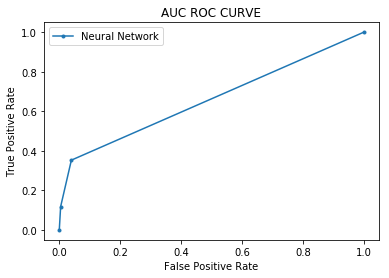

In [47]:
plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.plot(cr_fpr, cr_tpr, linestyle='--',linewidth=3, label='CRIB')
#plt.plot(cr2_fpr, cr2_tpr, 'r+',linestyle='--', label='CRIB II')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='SNAPPE II')
#plt.plot(ns2_fpr, ns2_tpr, linestyle='--', label='SNAP II')
#plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.legend(loc=0)
#plt.savefig('AUC_2.png',dpi=1200)

In [48]:
roc_auc_score(complete_df.dischargestatus,complete_df.pred)

0.658201606633843

In [49]:
ds = pd.DataFrame(complete_df.pred)
ds['true_outcome'] = complete_df.dischargestatus

In [50]:
def classify(x):
    if x>0.5:
        return 1
    else:
        return 0

In [51]:
complete_df.pred_1 = complete_df.pred.apply(classify)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [52]:
#reports
#Results might vary with each iteration as Deep Neural Networks,initially assigns random weights.
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(complete_df.dischargestatus,complete_df.pred_1))
print(confusion_matrix(complete_df.dischargestatus,complete_df.pred_1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       227
           1       0.40      0.35      0.38        17

   micro avg       0.92      0.92      0.92       244
   macro avg       0.68      0.66      0.67       244
weighted avg       0.91      0.92      0.92       244

[[218   9]
 [ 11   6]]


In [53]:
#complete_df.to_csv('CRIB_10_Jan_2.csv')

In [54]:
len(ds)

244

In [55]:
33/2

16.5

In [56]:
crib = pd.DataFrame(complete_df.dischargestatus)

In [57]:
crib['pred'] = complete_df.pred

In [58]:
crib.to_csv('crib_auc_new.csv')

In [59]:
crib

,dischargestatus,pred
0,1,0.73
1,1,0.09
2,1,0.55
3,1,0.55
4,1,0.09
5,1,0.09
6,1,0.09
7,1,0.09
8,1,0.55
9,1,0.09
